In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("../data/weight-height.csv")

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


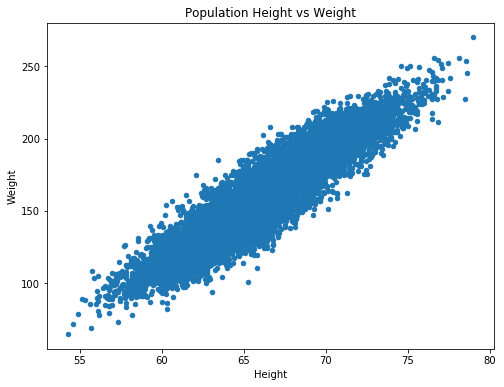

In [6]:
df.plot(kind='scatter', x='Height', y='Weight', title='Population Height vs Weight', figsize=(8,6));

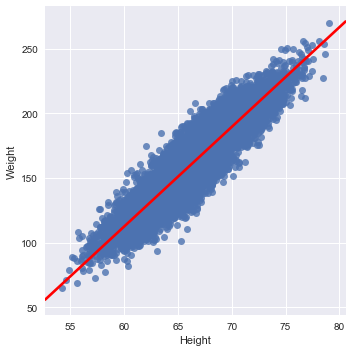

In [12]:
sns.lmplot(x='Height', y='Weight', data=df, line_kws={'color': 'red'})

(-11.0, 11.0, -1.0999069457184227, 1.099906945718423)

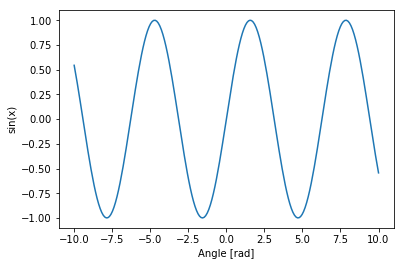

In [9]:
#x = np.linspace(-np.pi, np.pi, 201)
x = np.linspace(-10, 10, 200)
plt.plot(x, np.sin(x))
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')

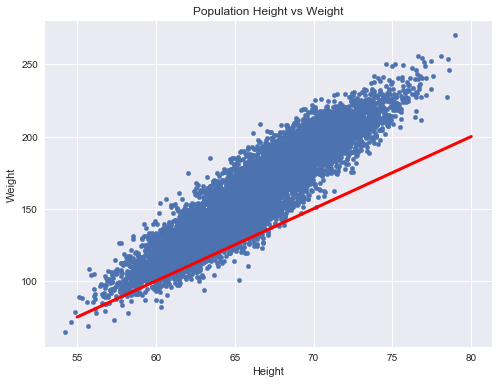

In [26]:
def line(x, w=0, b=0):
    return x*w+b

x = np.linspace(55, 80, 100)
yhat = line(x, w=5, b=-200)
df.plot(kind='scatter', x='Height', y='Weight', title='Population Height vs Weight', figsize=(8,6));
plt.plot(x, yhat, color="red", linewidth=3)

In [27]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [29]:
X = df['Height'].values
y_true = df['Weight'].values

150.886287478


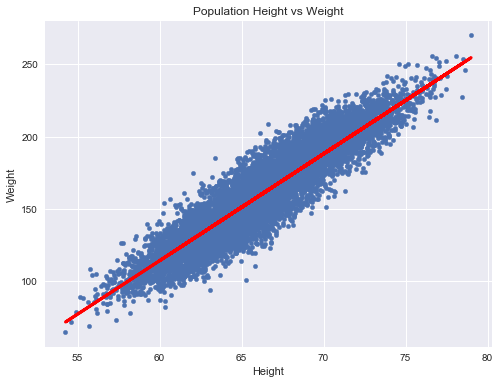

In [108]:
y_pred = line(X, w=7.4, b=-330) # totally guessing here
print(mean_squared_error(y_true, y_pred.ravel()))
df.plot(kind='scatter', x='Height', y='Weight', title='Population Height vs Weight', figsize=(8,6));
plt.plot(X, y_pred, color="red", linewidth=3)

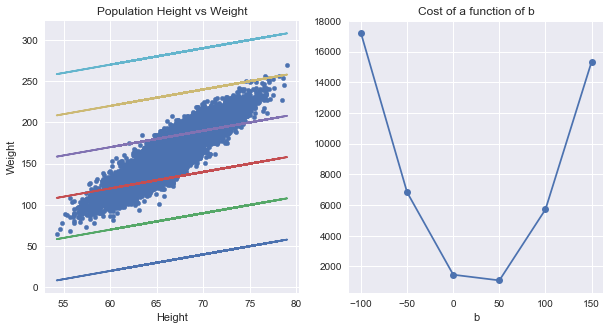

In [115]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(121)
df.plot(kind='scatter', x='Height', y='Weight', title='Population Height vs Weight',ax=ax1)
bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = []
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)
    
ax2 = plt.subplot(122)
plt.plot(bbs, mses, "o-")
plt.title("Cost of a function of b")
plt.xlabel("b")

# Linear Regression with Keras

In [121]:
# imports above
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.optimizers import Adam, SGD

In [140]:
model = Sequential()
model.add(Dense(1, input_shape=(1,))) #output's is 1 since this is a simple linear model y = mx+b 
# 1 for y, input_shape=(1,) for x

In [141]:
model.summary() # output shape is 1 for y, params is wieght and bias

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [142]:
model.compile(Adam(lr=0.8), 'mean_squared_error') # Adam is our optimizer MSE is our cost/loss function

In [147]:
model.fit(X, y_true, epochs=100, verbose=0)

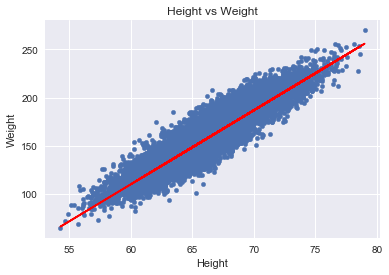

In [148]:
y_pred = model.predict(X)
df.plot(kind='scatter', x='Height', y="Weight", title="Height vs Weight")
plt.plot(X, y_pred, color='red')

In [149]:
W,B = model.get_weights()

In [150]:
print(W[0], B)

[ 7.68271399] [-350.90817261]


## import train_test_split (see above)

In [164]:
df = pd.read_csv("../data/weight-height.csv")
#X = df['Height'].values
#y = df['Weight'].values
X_train, X_test, y_train, y_test = train_test_split(df['Height'], df['Weight'], test_size=0.2)

In [165]:
print(len(X_train), len(X_test))

8000 2000


In [166]:
model = Sequential()
model.add(Dense(1, input_shape=(1,))) #output's is 1 since this is a simple linear model y = mx+b 
# 1 for y, input_shape=(1,) for x

In [167]:
model.summary() # output shape is 1 for y, params is wieght and bias

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [168]:
model.compile(Adam(lr=0.8), 'mean_squared_error') # Adam is our optimizer MSE is our cost/loss function

In [169]:
W[0,0] = 0.0
B[0] = 0.0
model.set_weights((W,B))

In [170]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [171]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [173]:
# import sklearn metrics above

In [175]:
print("The MSE on the train set is {}".format(mse(y_train, y_train_pred)))
print("The MSE on the test set is {}".format(mse(y_test, y_test_pred)))

The MSE on the train set is 221.7248242052794
The MSE on the test set is 218.13057565035962


In [180]:
print("The R2 score on the train set is {}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the test set is {}".format(r2_score(y_test, y_test_pred)))

The R2 score on the train set is 0.7851518945092798
The R2 score on the test set is 0.7873877769305426
